# **A. The $\beta$-method for a scalar IVP**

In [ ]:
# import all the packages here

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

import warnings


In [ ]:
# Performs integration for the linear IVP given by
#           d/dt u = lambda * u + g(t), u(t_0) = u_0
# using the beta-method
#
# INPUT
# lambda        constant defining the rhs
# g             function defining time-depdendent part of rhs
# tRange        the time interval [t_0, T] of integration
# u0            initial solution at t = tRange(1) (N x 1 array)
# beta          defines the method
# h             the step-size
#
# OUTPUT
# tArray        array containing the time points
# solArray      array containing the solution at each time point
#               (the ith row equals the solution at time tArray(i))

def LinearBetaMethod(Lambda, g, tRange, u0, beta, h):

    # initialize your output based on the number of time steps and on the size
    # of your initial condition; save also the initial condition in th first
    # row of your solArray

    # main loop: separate the cases for explicit and implicit Euler methods
    # you will need a predefined identity matrix for the implicit case

    t0, T = tRange
    num_steps = int((T - t0) / h) + 1

    tArray = np.linspace(t0, T, num_steps)
    solArray = np.zeros((num_steps, len(u0)))

    solArray[0] = u0

    for i in range(1, num_steps):
        t = tArray[i-1] + beta * h
        u_previous = solArray[i-1]

        if beta == 0:  # Explicit Euler method
            un = u_previous + h * (Lambda * u_previous + g(t))
        else:  # Implicit or Crank-Nicolson method
            def implicit_eq(un):
                return un - u_previous - h * (Lambda * ((1 - beta) * u_previous + beta * un) + g(t))
            un = fsolve(implicit_eq, u_previous)  # Solving the implicit equation

        solArray[i] = un

    return tArray, solArray



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


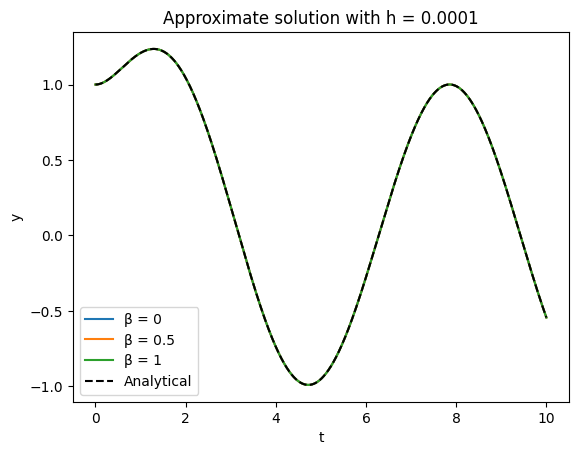

In [ ]:
# Test the linear solver

# set up the inputs for LinearBetaMethod to test it on the problem described at
# page 6 of the pdf, right before the discussion question for different values
# of beta. Use the following time range and initial condition

# Define the test function g(t)
def g(t):
    return -Lambda * np.sin(t) + np.cos(t)

Lambda = -1
h = 0.0001
tRange = [0, 10]
beta_values = [0, 0.5, 1]
u0 = np.array([1])

# Solve the problem for different values of beta and plot it
for beta in beta_values:
    tArray, solArray = LinearBetaMethod(Lambda, g, tRange, u0, beta, h)
    plt.plot(tArray, solArray[:, 0], label=f"β = {beta}")
    plt.legend()

# Plot the analytical solution
t_analytical = np.linspace(tRange[0], tRange[1], int((tRange[1] - tRange[0]) / h) + 1)
u_analytical = np.exp(Lambda * t_analytical) + np.sin(t_analytical)
plt.plot(t_analytical, u_analytical, label="Analytical", color="black", linestyle="dashed")
plt.title(f'Approximate solution with h = {h}')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()


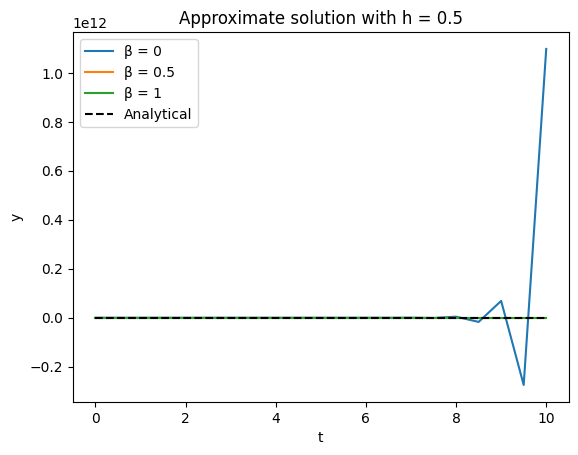

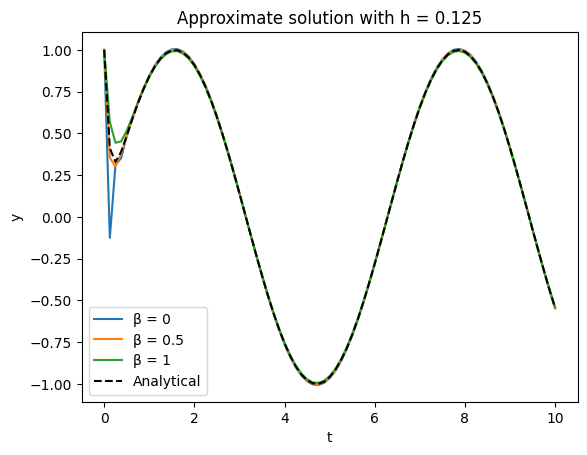

In [ ]:
## Discussion question A.1 (a)-(b)

# set up the new inputs for LinearBetaMethod and the analytical solution
# for each value of h create a figure containing the analytical solution and the
# 3 numerical solutions

# Define the test function g(t)
def g(t):
    return -Lambda * np.sin(t) + np.cos(t)

Lambda = -10
h = 0.5
tRange = [0, 10]
beta_values = [0, 0.5, 1]
u0 = np.array([1])

# Solve the problem for different values of beta and plot it
for beta in beta_values:
    tArray, solArray = LinearBetaMethod(Lambda, g, tRange, u0, beta, h)
    plt.plot(tArray, solArray[:, 0], label=f"β = {beta}")
    plt.legend()

# Plot the analytical solution
t_analytical = np.linspace(tRange[0], tRange[1], int((tRange[1] - tRange[0]) / h) + 1)
u_analytical = np.exp(Lambda * t_analytical) + np.sin(t_analytical)
plt.plot(t_analytical, u_analytical, label="Analytical", color="black", linestyle="dashed")
plt.title(f'Approximate solution with h = {h}')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

# Discussion A.1 a): Explain why instability is observed...

# A.1 b): Now we let h=0.125, all other variables remain the same
h = 0.125

# Solve the problem for different values of beta and plot it
for beta in beta_values:
    tArray, solArray = LinearBetaMethod(Lambda, g, tRange, u0, beta, h)
    plt.plot(tArray, solArray[:, 0], label=f"β = {beta}")
    plt.legend()

# Plot the analytical solution
t_analytical = np.linspace(tRange[0], tRange[1], int((tRange[1] - tRange[0]) / h) + 1)
u_analytical = np.exp(Lambda * t_analytical) + np.sin(t_analytical)
plt.plot(t_analytical, u_analytical, label="Analytical", color="black", linestyle="dashed")
plt.title(f'Approximate solution with h = {h}')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()




# **B. Accuracy of the $\beta$-method**

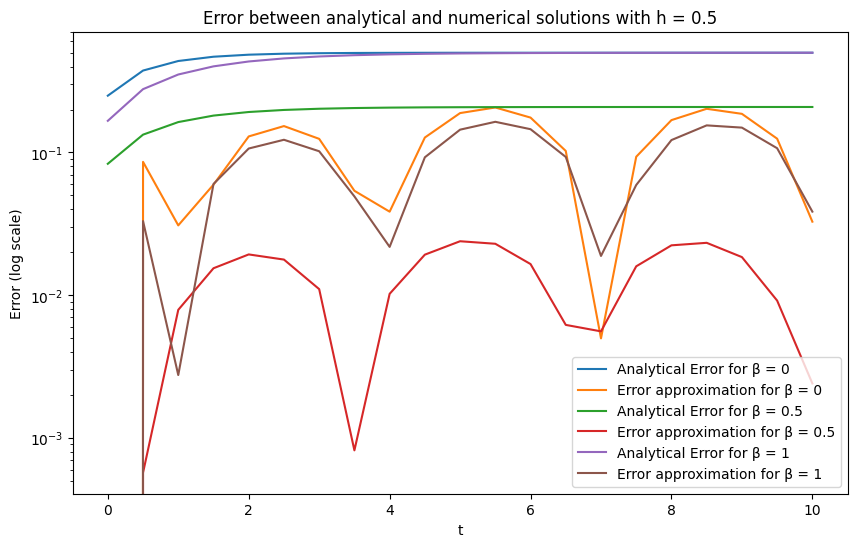

In [ ]:
## Discussion question B.1(a)

# you can define the amplification factor A as a function of multiple variables,
#       A = lambda h, Lambda, beta: ...

# REMINDER: the expression for T_max changes considerably with beta and
# determines the rigth-hand side that you have to plot


# IMPORTANT: the output of this cell consists of a single figure with 6 plots,
# 3 for the numerical errors and 3 for the right-hand sides, in a semilogy scale

# Define the parameters
Lambda = -1
h = 0.5
tRange = [0, 10]
u0 = np.array([1])
beta_values = [0, 0.5, 1]

# Define the amplification factor
def A(h, Lambda, beta):
    return (1 + (1 - beta) * Lambda * h) / (1 - beta * Lambda * h)

# Define tau_max for different beta values
tau_max_values = [
    h**2 * (1 + np.abs(Lambda)**2) / 2,
    (h**3) * (1 + np.abs(Lambda)**3) / 24 + (3/8) * (h**3) * np.abs(Lambda) * (1 + np.abs(Lambda)**2),
    h**2 * (1 + np.abs(Lambda)**2) / 2
]


# Compute the analytical solution with the new h value
t_analytical = np.linspace(tRange[0], tRange[1], int((tRange[1] - tRange[0]) / h) + 1)
u_analytical = np.exp(Lambda * t_analytical) + np.sin(t_analytical)

# Plot the errors
plt.figure(figsize=(10, 6))

for beta, tau_max in zip(beta_values, tau_max_values):
    tArray, solArray = LinearBetaMethod(Lambda, g, tRange, u0, beta, h)
    error_numerical = np.abs(solArray[:, 0] - u_analytical)
    A_value = A(h, Lambda, beta)
    error_analytical = (tau_max / np.abs(1 - beta * h * Lambda)) * ((1 - np.abs(A_value)**(np.arange(len(tArray))+1)) / (1 - np.abs(A_value)))

    plt.semilogy(tArray, error_analytical, label=f"Analytical Error for β = {beta}")
    plt.semilogy(tArray, error_numerical, label=f"Error approximation for β = {beta}")

plt.title(f'Error between analytical and numerical solutions with h = {h}')
plt.xlabel("t")
plt.ylabel("Error (log scale)")
plt.legend()
plt.show()



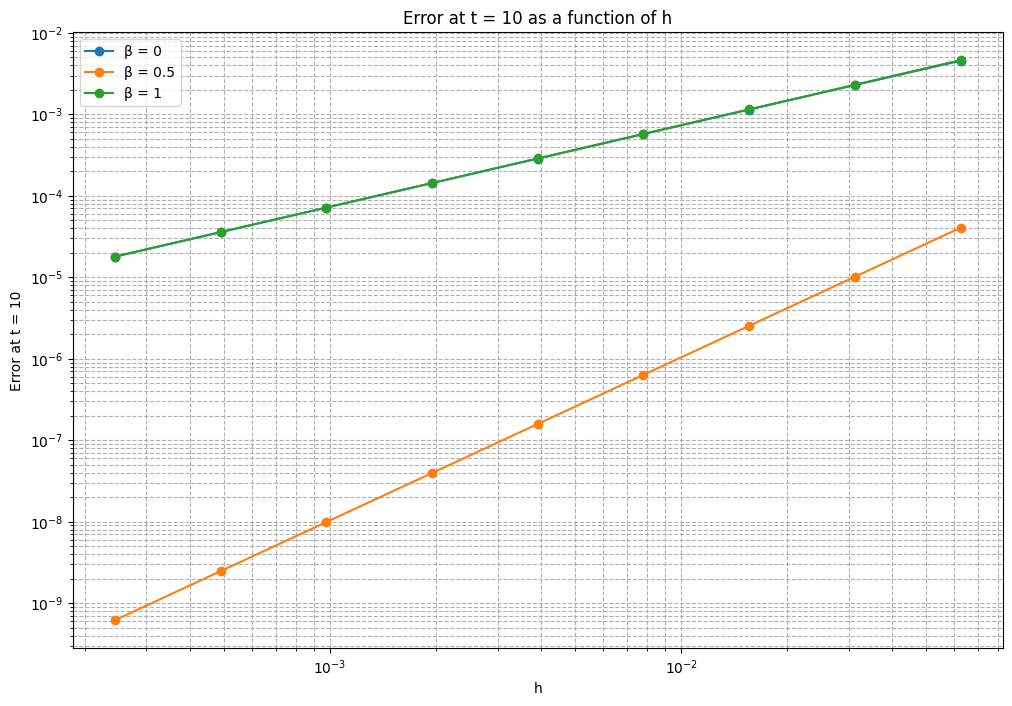

Slope for β = 0: 0.9987080352564247
Slope for β = 0.5: 1.999868252950587
Slope for β = 1: 1.0011775460584085


In [ ]:
## Discussion question B.1(b)

# the idea is completely analogous to the previous question, so you can reuse a
# lot of code

# set up the corrct values for h

# IMPORTANT: the output of this cell consists of a print out of the slopes
# and a single figure with the 3 error plots in a loglog scale

# Analytical solution at t = T
T1 = 10
u_analytical_T = np.exp(Lambda * T1) + np.sin(T1)

# Values of h
h_values = [2**-l for l in range(4, 13)]  # h = 2^-4 to 2^-12
errors = {0: [], 0.5: [], 1: []}

# Compute errors for different beta values and h values
for h in h_values:
    for beta in [0, 0.5, 1]:
        tArray, solArray = LinearBetaMethod(Lambda, g, [0, T1], u0=np.array([1]), beta=beta, h=h)
        error_at_T = np.abs(solArray[-1, 0] - u_analytical_T)
        errors[beta].append(error_at_T)

# Plot the errors on a log-log scale
plt.figure(figsize=(12, 8))

for beta in [0, 0.5, 1]:
    plt.loglog(h_values, errors[beta], label=f"β = {beta}", marker='o')

plt.title(f'Error at t = {T1} as a function of h')
plt.xlabel('h')
plt.ylabel(f'Error at t = {T1}')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Compute the slopes of the error lines
for beta in [0, 0.5, 1]:
    slopes = np.polyfit(np.log(h_values), np.log(errors[beta]), 1)[0]
    print(f"Slope for β = {beta}: {slopes}")





## **C. The $\beta$-method for a system of IVP**

In [ ]:
## paste here your version of newton() from Unit 2

def newton(f, df, x0, tol, maxit):
    'Uses the Newton Method to compute the root of a function'
    try:
        e = []
        x_p = []
        iter = 0
        error = 1

        while error > tol and iter < maxit:
            delta = np.linalg.solve(df(x0), f(x0))
            x = x0 - delta
            error = np.linalg.norm(delta)
            e.append(error)
            x0 = x
            x_p.append(x0)
            iter += 1

        boolean = min(e) < tol
        return x_p[-1], boolean, x_p, e

    except ZeroDivisionError:
        boolean = False
        return x0, boolean, [], e

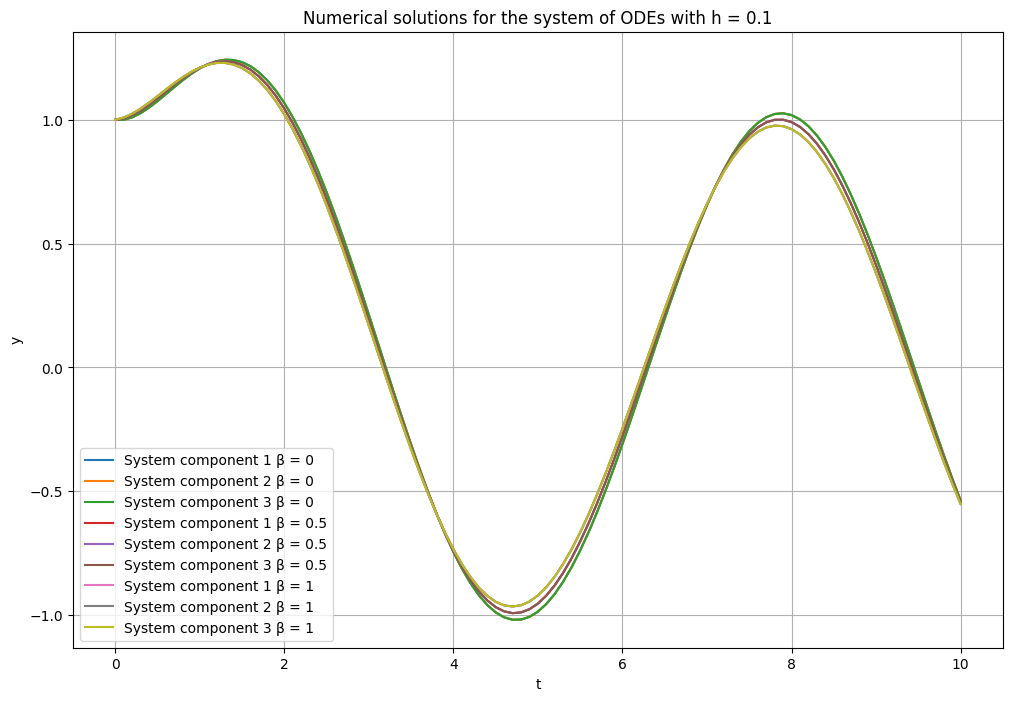

In [ ]:
def BetaMethod(f, tRange, u0, df, beta, h):
    t0, T = tRange
    num_steps = int((T - t0) / h) + 1

    tArray = np.linspace(t0, T, num_steps)
    solArray = np.zeros((num_steps, len(u0)))

    solArray[0] = u0

    I = np.eye(len(u0))

    for i in range(1, num_steps):
        t = tArray[i-1] + beta * h
        u_previous = solArray[i-1]

        if beta == 0:  # Explicit Euler method
            solArray[i] = u_previous + h * f(t, u_previous)
        else:  # Implicit or Crank-Nicolson method
            def implicit_eq(un):
                return un - u_previous - h * f(t, (1 - beta) * u_previous + beta * un)

            def jacobian(un):
                return I - beta * h * df(t, (1 - beta) * u_previous + beta * un)

            try:
                un, success, x_p, e = newton(implicit_eq, jacobian, u_previous, tol=1e-12, maxit=50)
                if not success:
                    raise RuntimeError("Newton's method did not converge")
                solArray[i] = un
            except RuntimeError as e:
                print(f"Newton's method did not converge at step {i} for beta = {beta}: {e}")
                return tArray[:i], solArray[:i]

    return tArray, solArray

# Define the system of ODEs for the test problem (6)
def f_system(t, y):
    return np.array([Lambda * (y_i - np.sin(t)) + np.cos(t) for y_i in y])

def df_system(t, y):
    return np.diag([Lambda] * len(y))

# Parameters
Lambda = -1
h = 0.1
tRange = [0, 10]
u0_system = np.array([1, 1, 1])  # Initial conditions for a system of 3 identical ODEs
beta_values = [0, 0.5, 1]

# Plot the numerical solutions for the system of ODEs using BetaMethod
plt.figure(figsize=(12, 8))

for beta in beta_values:
    tArray, solArray = BetaMethod(f_system, tRange, u0_system, df_system, beta, h)

    for i in range(len(u0_system)):
        plt.plot(tArray, solArray[:, i], label=f"System component {i+1} β = {beta}")

plt.title(f'Numerical solutions for the system of ODEs with h = {h}')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# INPUT
# x             position of dynamic body
# G             gravitational constant
# M             mass of attracting body
#
# OUTPUT
# g             gravitational acceleration

def gravAccF(x, M, G=4*np.pi**2):
    norm_x = np.linalg.norm(x)
    return -G * M * x / norm_x**3

In [ ]:
# INPUT
# x             position of dynamic body
# G             gravitational constant
# M             mass of attracting body
#
# OUTPUT
# jacG          Jacobian of gravitational acceleration w.r.t. position x

# Jacobian of the gravitational acceleration function
def gravAccJac(x, M, G=4*np.pi**2):
    norm_x = np.linalg.norm(x)
    I = np.eye(len(x))
    return -G * M / norm_x**3 * I + 3 * G * M * np.outer(x, x) / norm_x**5


In [ ]:
# Right-hand side function for the two-body problem
def rhs(t, y):
    n = len(y) // 2  # Number of spatial dimensions
    x = y[:n]        # Position components
    v = y[n:]        # Velocity components
    dxdt = v         # Time derivative of position is velocity
    dvdt = gravAccF(x, 1)  # Time derivative of velocity is acceleration
    return np.concatenate([dxdt, dvdt])  # Concatenate derivatives into a single vector

# Jacobian of the right-hand side function
def jacobian_rhs(t, y, beta, h):
    n = len(y) // 2  # Number of spatial dimensions
    x = y[:n]        # Position components
    v = y[n:]        # Velocity components
    J_top = np.hstack([np.zeros((n, n)), np.eye(n)])  # Jacobian for dxdt with respect to y

    # Calculate x at t_{n + beta}
    x_t_n_beta = (1 - beta) * x + beta * (x + h * v)

    J_bottom = np.hstack([gravAccJac(x_t_n_beta, 1), np.zeros((n, n))])  # Jacobian for dvdt with respect to y
    return np.vstack([J_top, J_bottom])  # Combine Jacobian blocks

Newton's method did not converge at step 24 for beta = 1: Newton's method did not converge


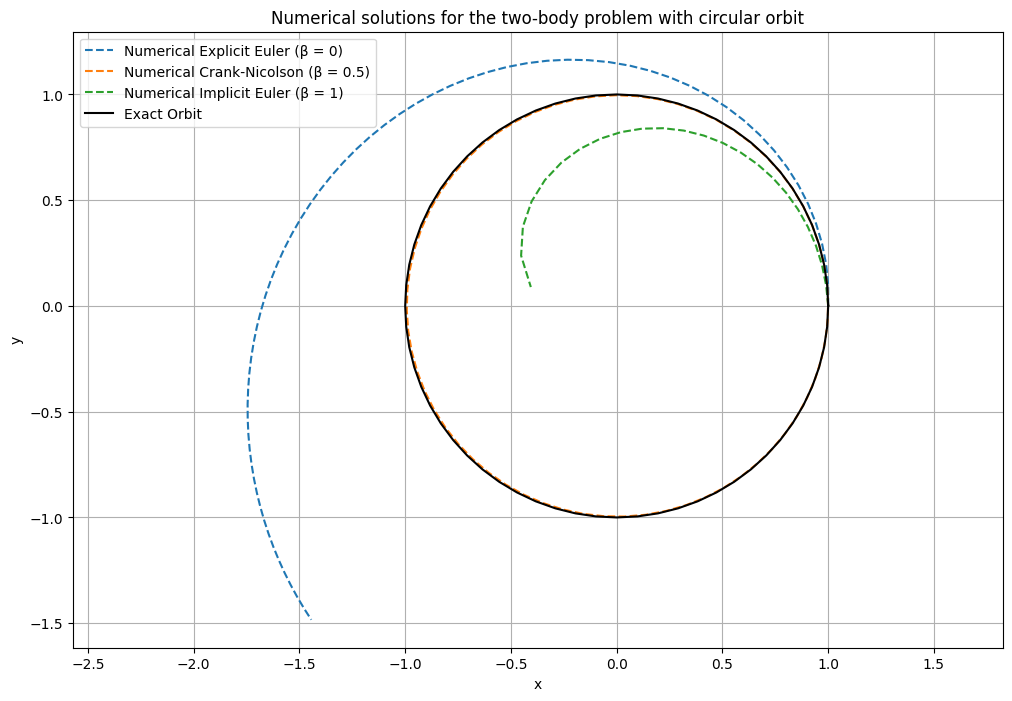

In [ ]:
## Discussion question C.1

# set up all the parameters given in the pdf for the 2 body problem

# then define all the inputs for BetaMethod() and the exact solution function
# handle; use the following syntax to define function handles
#       f = lambda var1, var2, var3: ...
# the code will be considerably more readable

# other parameter needed: beta, h, time range

# finally solve the system using BetaMethod() and plot (x_1(t), x_2(t)) for
# the 3 values of beta in the samee figure together with the exact solution


# Exact solution for the circular orbit
def exact_solution(t, R=1, omega=2*np.pi):
    x_exact = R * np.cos(omega * t)
    y_exact = R * np.sin(omega * t)
    return np.array([x_exact, y_exact])

# Parameters for the two-body problem
R = 1
M = 1
G = 4 * np.pi**2
omega = 2 * np.pi
T = 2 * np.pi / omega

# Initial conditions for a circular orbit
x0 = np.array([R, 0])
v0 = np.array([0, R * omega])
y0 = np.concatenate([x0, v0])

# Time step
h = 2**(-6) * T

# Simulation for one period
tRange = [0, T]
beta_values = [0, 0.5, 1]
beta_labels = {0: "Explicit Euler (β = 0)", 0.5: "Crank-Nicolson (β = 0.5)", 1: "Implicit Euler (β = 1)"}

# Plot the numerical solutions for different values of beta and the exact solution
plt.figure(figsize=(12, 8))

# Compute the exact solution at each time step
t_exact = np.linspace(0, T, int(T / h) + 1)
exact_orbit = np.array([exact_solution(t) for t in t_exact])

for beta in beta_values:
    tArray, solArray = BetaMethod(rhs, tRange, y0, lambda t, y: jacobian_rhs(t, y, beta, h), beta, h)

    # Plot the numerical solution
    x_vals = solArray[:, 0]
    y_vals = solArray[:, 1]
    plt.plot(x_vals, y_vals, label=f"Numerical {beta_labels[beta]}", linestyle='--')

# Plot the exact orbit
plt.plot(exact_orbit[:, 0], exact_orbit[:, 1], label='Exact Orbit', linestyle='-', color='black')

plt.title('Numerical solutions for the two-body problem with circular orbit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Discussion C.1
# For β = 0 (Explicit Euler):
# The Explicit Euler method is a first-order method and can be unstable for stiff problems.
# It may show significant deviation from the exact orbit due to the accumulation of numerical errors.

# For β = 0.5 (Crank-Nicolson):
# The Crank-Nicolson method is a second-order, implicit method and generally more stable and accurate for stiff problems.
# It should show better accuracy compared to Explicit Euler, closely matching the exact orbit.

# For β = 1 (Implicit Euler):
# The Implicit Euler method is a first-order, implicit method and is unconditionally stable for stiff problems.
# While it is stable, it may not be as accurate as Crank-Nicolson but should still perform better than Explicit Euler.


Newton's method did not converge at step 2 for beta = 1: Newton's method did not converge
Newton's method did not converge at step 7 for beta = 1: Newton's method did not converge
Newton's method did not converge at step 24 for beta = 1: Newton's method did not converge
Newton's method did not converge at step 77 for beta = 1: Newton's method did not converge


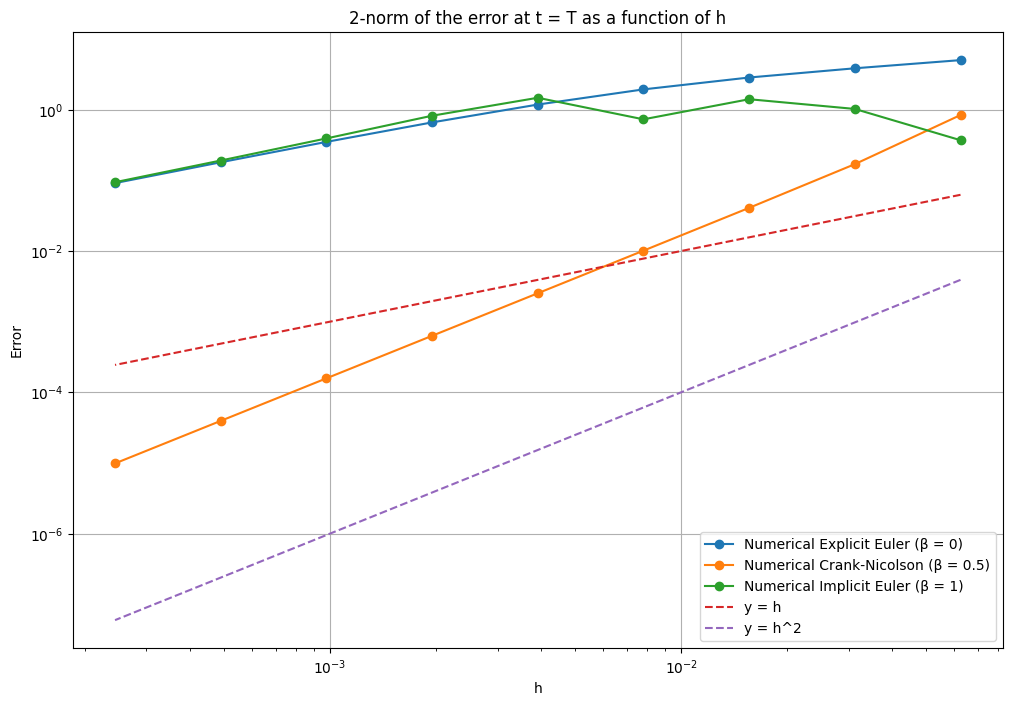

In [ ]:
## Discussion question C.2

# set up the inputs of BetaMethod and initialize the error variable

# solve the system using different values of beta and h and store the error

# IMPORTANT: the output of this cell is a single figure with 6 plots, 3 for the
# error and 3 for the corresponding functions to compare the slopes (for beta
# equal to 0 and 1 they will be the same)

# Define the range of l values and corresponding h values
l_values = range(4, 13)
h_values = [2**-l * T for l in l_values]

# Define beta values and labels
beta_values = [0, 0.5, 1]
beta_labels = {0: "Explicit Euler (β = 0)", 0.5: "Crank-Nicolson (β = 0.5)", 1: "Implicit Euler (β = 1)"}
errors = {beta: [] for beta in beta_values}

# Run simulations and compute errors
for h in h_values:
    t_exact = np.linspace(0, T, int(T / h) + 1)
    exact_orbit = np.array([exact_solution(t) for t in t_exact])

    for beta in beta_values:
        try:
            tArray, solArray = BetaMethod(rhs, [0, T], y0, lambda t, y: jacobian_rhs(t, y, beta, h), beta, h)
            # Compute the 2-norm of the error at t = T
            error = np.linalg.norm(solArray[-1, :2] - exact_orbit[-1])
            errors[beta].append(error)
        except RuntimeError as e:
            print(f"Failed for beta = {beta}, h = {h}: {e}")
            errors[beta].append(np.nan)  # Append NaN to keep dimensions consistent

# Convert error lists to numpy arrays for easier handling
for beta in beta_values:
    errors[beta] = np.array(errors[beta])

# Plot the errors on a log-log scale
plt.figure(figsize=(12, 8))

h_line = [h for h in h_values]
h2_line = [h**2 for h in h_values]

for beta in beta_values:
    valid_indices = ~np.isnan(errors[beta])  # Ignore NaN values in the plot
    plt.loglog(np.array(h_values)[valid_indices], errors[beta][valid_indices], label=f"Numerical {beta_labels[beta]}", marker='o')

# Plot the reference lines y = h and y = h^2
plt.loglog(h_values, h_line, label='y = h', linestyle='--')
plt.loglog(h_values, h2_line, label='y = h^2', linestyle='--')

plt.title('2-norm of the error at t = T as a function of h')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Discussion
# For β = 0 (Explicit Euler):
# The slope should be around 1, indicating first-order accuracy, as the method is known to be first-order accurate.

# For β = 0.5 (Crank-Nicolson):
# The slope should be around 2, indicating second-order accuracy, as the method is known to be second-order accurate.

# For β = 1 (Implicit Euler):
# The slope should be around 1, indicating first-order accuracy, as the method is known to be first-order accurate.

